# Necessary Comment : jupyter notebook

## Necessary Lighbary



In [83]:
import sqlite3
import pandas as pd
import talib
import mplfinance as mpf
import numpy as np

## Database Connection

In [84]:
connection = sqlite3.connect(r"cripto.db")
# connection = sqlite3.connect(r"big_data.db")
cur = connection.cursor()
database_data = cur.execute("select * from asset order by CloseTime").fetchall()

## Dataframe

In [85]:
df = pd.DataFrame(database_data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,422,BTCBUSD,16841.25,16842.68,16840.44,16841.23,22.19256,-0.00011875603058227,1.671786e+12,3.737574e+05,1012.0,12.17745,1671785460
1,1259,BTCBUSD,16780.86,16782.84,16780.13,16780.84,16.05611,-0.000119183402998634,1.671836e+12,2.694465e+05,959.0,10.11766,1671835680
2,989,BTCBUSD,16842.63,16843.59,16840.26,16842.60,31.72397,-0.000178119450480559,1.671820e+12,5.342920e+05,1397.0,15.68889,1671819480
3,309,BTCBUSD,16842.11,16842.97,16841.06,16842.08,17.23217,-0.000178124949895446,1.671779e+12,2.902238e+05,647.0,11.53437,1671778680
4,1393,BTCBUSD,16806.81,16808.76,16806.15,16806.78,12.86098,-0.000178499072712037,1.671844e+12,2.161559e+05,800.0,6.94100,1671843720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,709,BTCBUSD,16821.17,16849.04,16816.46,16849.03,281.49546,0.16562462658662,1.671803e+12,4.737096e+06,5075.0,153.89067,1671802680
1436,710,BTCBUSD,16849.01,16905.74,16846.50,16886.84,721.90139,0.224523577349659,1.671803e+12,1.218545e+07,11123.0,386.32321,1671802740
1437,701,BTCBUSD,16835.04,16955.00,16735.00,16941.00,2102.18665,0.629401533943484,1.671802e+12,3.535400e+07,27033.0,1026.64409,1671802200
1438,341,BTCBUSD,16849.31,16851.63,16848.30,16849.32,15.59350,5.93496113395699e-05,1.671781e+12,2.627447e+05,898.0,6.70223,1671780600


## Name Columns

In [86]:
df.columns = ['Id', 'Symbol', 'Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime','VolumeBUSD', 'Trades', 'BuyQuoteVolume', 'Time']
# df = df.iloc[:, 2:12]
df


,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,CloseTime,VolumeBUSD,Trades,BuyQuoteVolume,Time
0,422,BTCBUSD,16841.25,16842.68,16840.44,16841.23,22.19256,-0.00011875603058227,1.671786e+12,3.737574e+05,1012.0,12.17745,1671785460
1,1259,BTCBUSD,16780.86,16782.84,16780.13,16780.84,16.05611,-0.000119183402998634,1.671836e+12,2.694465e+05,959.0,10.11766,1671835680
2,989,BTCBUSD,16842.63,16843.59,16840.26,16842.60,31.72397,-0.000178119450480559,1.671820e+12,5.342920e+05,1397.0,15.68889,1671819480
3,309,BTCBUSD,16842.11,16842.97,16841.06,16842.08,17.23217,-0.000178124949895446,1.671779e+12,2.902238e+05,647.0,11.53437,1671778680
4,1393,BTCBUSD,16806.81,16808.76,16806.15,16806.78,12.86098,-0.000178499072712037,1.671844e+12,2.161559e+05,800.0,6.94100,1671843720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,709,BTCBUSD,16821.17,16849.04,16816.46,16849.03,281.49546,0.16562462658662,1.671803e+12,4.737096e+06,5075.0,153.89067,1671802680
1436,710,BTCBUSD,16849.01,16905.74,16846.50,16886.84,721.90139,0.224523577349659,1.671803e+12,1.218545e+07,11123.0,386.32321,1671802740
1437,701,BTCBUSD,16835.04,16955.00,16735.00,16941.00,2102.18665,0.629401533943484,1.671802e+12,3.535400e+07,27033.0,1026.64409,1671802200
1438,341,BTCBUSD,16849.31,16851.63,16848.30,16849.32,15.59350,5.93496113395699e-05,1.671781e+12,2.627447e+05,898.0,6.70223,1671780600


# Make a Candle plot

In [87]:
# """
# Candle Data Column
# """
# df_candle = df[['CloseTime', 'Open', 'High', 'Low', 'Close', 'VolumeBTC']]

# """
# Time Indexing
# """
# df_candle = df.set_index('CloseTime')
# df_candle.index = pd.to_datetime(df.index, unit='ms')

# mpf.plot(
#     df_candle.tail(100),
# #     df,
#     mav=[7, 25 , 90],
#     type="candle",
# #     type="renko",
#     title=f"BTC BUSD Price Candle",
#     style="yahoo",
# )

In [88]:
df = df.set_index('CloseTime')
df.index = pd.to_datetime(df.index, unit='ms')
# df = df.tail(100)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,VolumeBUSD,Trades,BuyQuoteVolume,Time
CloseTime,,,,,,,,,,,,
2022-12-23 08:51:59.999000064,422,BTCBUSD,16841.25,16842.68,16840.44,16841.23,22.19256,-0.00011875603058227,3.737574e+05,1012.0,12.17745,1671785460
2022-12-23 22:48:59.999000064,1259,BTCBUSD,16780.86,16782.84,16780.13,16780.84,16.05611,-0.000119183402998634,2.694465e+05,959.0,10.11766,1671835680
2022-12-23 18:18:59.999000064,989,BTCBUSD,16842.63,16843.59,16840.26,16842.60,31.72397,-0.000178119450480559,5.342920e+05,1397.0,15.68889,1671819480
2022-12-23 06:58:59.999000064,309,BTCBUSD,16842.11,16842.97,16841.06,16842.08,17.23217,-0.000178124949895446,2.902238e+05,647.0,11.53437,1671778680
2022-12-24 01:02:59.999000064,1393,BTCBUSD,16806.81,16808.76,16806.15,16806.78,12.86098,-0.000178499072712037,2.161559e+05,800.0,6.94100,1671843720
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 13:38:59.999000064,709,BTCBUSD,16821.17,16849.04,16816.46,16849.03,281.49546,0.16562462658662,4.737096e+06,5075.0,153.89067,1671802680
2022-12-23 13:39:59.999000064,710,BTCBUSD,16849.01,16905.74,16846.50,16886.84,721.90139,0.224523577349659,1.218545e+07,11123.0,386.32321,1671802740
2022-12-23 13:30:59.999000064,701,BTCBUSD,16835.04,16955.00,16735.00,16941.00,2102.18665,0.629401533943484,3.535400e+07,27033.0,1026.64409,1671802200


In [89]:
# from dataframe import GetDataframe
# df = GetDataframe().data_function('BTCBUSD', 1, 10000)
# df

# Super Trend

https://medium.com/codex/step-by-step-implementation-of-the-supertrend-indicator-in-python-656aa678c111

In [90]:
# df = df.iloc[:, 2:7]
# df.rename(columns={'VolumeBTC': 'volume'}, inplace=True)
# df.index = df.index.rename('datetime')
# df = df.applymap(lambda s:s.lower() if isinstance(s, str) else s)
# tsla = df
# tsla['High']

In [91]:
# def get_supertrend(high, low, close, lookback, multiplier):
#
#     # ATR
#
#     tr1 = pd.DataFrame(high - low)
#     tr2 = pd.DataFrame(abs(high - close.shift(1)))
#     tr3 = pd.DataFrame(abs(low - close.shift(1)))
#     frames = [tr1, tr2, tr3]
#     tr = pd.concat(frames, axis = 1, join = 'inner').max(axis = 1)
#     atr = tr.ewm(lookback).mean()
#
#     # H/L AVG AND BASIC UPPER & LOWER BAND
#
#     hl_avg = (high + low) / 2
#     upper_band = (hl_avg + multiplier * atr).dropna()
#     lower_band = (hl_avg - multiplier * atr).dropna()
#
#     # FINAL UPPER BAND
#     final_bands = pd.DataFrame(columns = ['upper', 'lower'])
#     final_bands.iloc[:,0] = [x for x in upper_band - upper_band]
#     final_bands.iloc[:,1] = final_bands.iloc[:,0]
#     for i in range(len(final_bands)):
#         if i == 0:
#             final_bands.iloc[i,0] = 0
#         else:
#             if (upper_band[i] < final_bands.iloc[i-1,0]) | (close[i-1] > final_bands.iloc[i-1,0]):
#                 final_bands.iloc[i,0] = upper_band[i]
#             else:
#                 final_bands.iloc[i,0] = final_bands.iloc[i-1,0]
#
#     # FINAL LOWER BAND
#
#     for i in range(len(final_bands)):
#         if i == 0:
#             final_bands.iloc[i, 1] = 0
#         else:
#             if (lower_band[i] > final_bands.iloc[i-1,1]) | (close[i-1] < final_bands.iloc[i-1,1]):
#                 final_bands.iloc[i,1] = lower_band[i]
#             else:
#                 final_bands.iloc[i,1] = final_bands.iloc[i-1,1]
#
#     # SUPERTREND
#
#     supertrend = pd.DataFrame(columns = [f'supertrend_{lookback}'])
#     supertrend.iloc[:,0] = [x for x in final_bands['upper'] - final_bands['upper']]
#
#     for i in range(len(supertrend)):
#         if i == 0:
#             supertrend.iloc[i, 0] = 0
#         elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 0] and close[i] < final_bands.iloc[i, 0]:
#             supertrend.iloc[i, 0] = final_bands.iloc[i, 0]
#         elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 0] and close[i] > final_bands.iloc[i, 0]:
#             supertrend.iloc[i, 0] = final_bands.iloc[i, 1]
#         elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 1] and close[i] > final_bands.iloc[i, 1]:
#             supertrend.iloc[i, 0] = final_bands.iloc[i, 1]
#         elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 1] and close[i] < final_bands.iloc[i, 1]:
#             supertrend.iloc[i, 0] = final_bands.iloc[i, 0]
#
#     supertrend = supertrend.set_index(upper_band.index)
#     supertrend = supertrend.dropna()[1:]
#
#     # ST UPTREND/DOWNTREND
#
#     upt = []
#     dt = []
#     close = close.iloc[len(close) - len(supertrend):]
#
#     for i in range(len(supertrend)):
#         if close[i] > supertrend.iloc[i, 0]:
#             upt.append(supertrend.iloc[i, 0])
#             dt.append(np.nan)
#         elif close[i] < supertrend.iloc[i, 0]:
#             upt.append(np.nan)
#             dt.append(supertrend.iloc[i, 0])
#         else:
#             upt.append(np.nan)
#             dt.append(np.nan)
#
#     st, upt, dt = pd.Series(supertrend.iloc[:, 0]), pd.Series(upt), pd.Series(dt)
#     upt.index, dt.index = supertrend.index, supertrend.index
#
#     return st, upt, dt
#
# df['st'] = get_supertrend(df['High'], df['Low'], df['Close'], 1000, 3)

In [92]:
# # SUPERTREND CALCULATION
# def get_supertrend(high, low, close, lookback, multiplier):

#     # ATR

#     tr1 = pd.DataFrame(high - low)
#     tr2 = pd.DataFrame(abs(high - close.shift(1)))
#     tr3 = pd.DataFrame(abs(low - close.shift(1)))
#     frames = [tr1, tr2, tr3]
#     tr = pd.concat(frames, axis = 1, join = 'inner').max(axis = 1)
#     atr = tr.ewm(lookback).mean()

#     # H/L AVG AND BASIC UPPER & LOWER BAND

#     hl_avg = (high + low) / 2
#     upper_band = (hl_avg + multiplier * atr).dropna()
#     lower_band = (hl_avg - multiplier * atr).dropna()

#     # FINAL UPPER BAND

#     final_bands = pd.DataFrame(columns = ['upper', 'lower'])
#     final_bands.iloc[:,0] = [x for x in upper_band - upper_band]
#     final_bands.iloc[:,1] = final_bands.iloc[:,0]

#     for i in range(len(final_bands)):
#         if i == 0:
#             final_bands.iloc[i,0] = 0
#         else:
#             if (upper_band[i] < final_bands.iloc[i-1,0]) | (close[i-1] > final_bands.iloc[i-1,0]):
#                 final_bands.iloc[i,0] = upper_band[i]
#             else:
#                 final_bands.iloc[i,0] = final_bands.iloc[i-1,0]

#     # FINAL LOWER BAND

#     for i in range(len(final_bands)):
#         if i == 0:
#             final_bands.iloc[i, 1] = 0
#         else:
#             if (lower_band[i] > final_bands.iloc[i-1,1]) | (close[i-1] < final_bands.iloc[i-1,1]):
#                 final_bands.iloc[i,1] = lower_band[i]
#             else:
#                 final_bands.iloc[i,1] = final_bands.iloc[i-1,1]

#     # SUPERTREND

#     supertrend = pd.DataFrame(columns = [f'supertrend_{lookback}'])
#     supertrend.iloc[:,0] = [x for x in final_bands['upper'] - final_bands['upper']]

#     for i in range(len(supertrend)):
#         if i == 0:
#             supertrend.iloc[i, 0] = 0
#         elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 0] and close[i] < final_bands.iloc[i, 0]:
#             supertrend.iloc[i, 0] = final_bands.iloc[i, 0]
#         elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 0] and close[i] > final_bands.iloc[i, 0]:
#             supertrend.iloc[i, 0] = final_bands.iloc[i, 1]
#         elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 1] and close[i] > final_bands.iloc[i, 1]:
#             supertrend.iloc[i, 0] = final_bands.iloc[i, 1]
#         elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 1] and close[i] < final_bands.iloc[i, 1]:
#             supertrend.iloc[i, 0] = final_bands.iloc[i, 0]

#     supertrend = supertrend.set_index(upper_band.index)
#     supertrend = supertrend.dropna()[1:]

#     # ST UPTREND/DOWNTREND

#     upt = []
#     dt = []
#     close = close.iloc[len(close) - len(supertrend):]

#     for i in range(len(supertrend)):
#         if close[i] > supertrend.iloc[i, 0]:
#             upt.append(supertrend.iloc[i, 0])
#             dt.append(np.nan)
#         elif close[i] < supertrend.iloc[i, 0]:
#             upt.append(np.nan)
#             dt.append(supertrend.iloc[i, 0])
#         else:
#             upt.append(np.nan)
#             dt.append(np.nan)

#     st, upt, dt = pd.Series(supertrend.iloc[:, 0]), pd.Series(upt), pd.Series(dt)
#     upt.index, dt.index = supertrend.index, supertrend.index

#     return st, upt, dt

# tsla['st'], tsla['s_upt'], tsla['st_dt'] = get_supertrend(tsla['High'], tsla['Low'], tsla['Close'], 10, 3)
# tsla = tsla[1:]
# print(tsla.head())

# # SUPERTREND STRATEGY

# def implement_st_strategy(prices, st):
#     buy_price = []
#     sell_price = []
#     st_signal = []
#     signal = 0

#     for i in range(len(st)):
#         if st[i-1] > prices[i-1] and st[i] < prices[i]:
#             if signal != 1:
#                 buy_price.append(prices[i])
#                 sell_price.append(np.nan)
#                 signal = 1
#                 st_signal.append(signal)
#             else:
#                 buy_price.append(np.nan)
#                 sell_price.append(np.nan)
#                 st_signal.append(0)
#         elif st[i-1] < prices[i-1] and st[i] > prices[i]:
#             if signal != -1:
#                 buy_price.append(np.nan)
#                 sell_price.append(prices[i])
#                 signal = -1
#                 st_signal.append(signal)
#             else:
#                 buy_price.append(np.nan)
#                 sell_price.append(np.nan)
#                 st_signal.append(0)
#         else:
#             buy_price.append(np.nan)
#             sell_price.append(np.nan)
#             st_signal.append(0)

#     return buy_price, sell_price, st_signal

# buy_price, sell_price, st_signal = implement_st_strategy(tsla['Close'], tsla['st'])

# # GENERATING STOCK POSITION
# position = []
# for i in range(len(st_signal)):
#     if st_signal[i] > 1:
#         position.append(0)
#     else:
#         position.append(1)

# for i in range(len(tsla['Close'])):
#     if st_signal[i] == 1:
#         position[i] = 1
#     elif st_signal[i] == -1:
#         position[i] = 0
#     else:
#         position[i] = position[i-1]

# close_price = tsla['Close']
# st = tsla['st']
# st_signal = pd.DataFrame(st_signal).rename(columns = {0:'st_signal'}).set_index(tsla.index)
# position = pd.DataFrame(position).rename(columns = {0:'st_position'}).set_index(tsla.index)

# frames = [close_price, st, st_signal, position]
# strategy = pd.concat(frames, join = 'inner', axis = 1)

# strategy.head()
# print(strategy[20:25])

# Make a Custom Pattern

In [93]:
# # TODO: ALL all 100 and -100 to the X asis
# # Find Candle Pattern
ENGULFING = talib.CDLENGULFING(df['Open'], df['High'], df['Low'],
                                         df['Close'])
ENGULFING
ENGULFING[ENGULFING != 0]

# bullish_engulfing = (ENGULFING.replace([-100, 0], np.nan)/100) *(df.Low-2)
# bearsh_engulfing = (-ENGULFING.replace([100, 0], np.nan)/100) *(df.High *1.0001)

# addplot = [mpf.make_addplot(bullish_engulfing, type='scatter', color='g', marker = "^"), mpf.make_addplot(bearsh_engulfing, type='scatter', color='r', marker = "v")]
# mpf.plot(df, addplot = addplot,title=f"Engulfing Signal", type="candle",style="yahoo")

Series([], dtype: int32)

In [94]:
# dir(talib)

In [95]:
"""
means you are dropping duplicket column.
https://stackoverflow.com/questions/35084071/concat-dataframe-reindexing-only-valid-with-uniquely-valued-index-objects

"""
# df = df.head(100)
df = df.reset_index(drop=True)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,VolumeBUSD,Trades,BuyQuoteVolume,Time
0,422,BTCBUSD,16841.25,16842.68,16840.44,16841.23,22.19256,-0.00011875603058227,3.737574e+05,1012.0,12.17745,1671785460
1,1259,BTCBUSD,16780.86,16782.84,16780.13,16780.84,16.05611,-0.000119183402998634,2.694465e+05,959.0,10.11766,1671835680
2,989,BTCBUSD,16842.63,16843.59,16840.26,16842.60,31.72397,-0.000178119450480559,5.342920e+05,1397.0,15.68889,1671819480
3,309,BTCBUSD,16842.11,16842.97,16841.06,16842.08,17.23217,-0.000178124949895446,2.902238e+05,647.0,11.53437,1671778680
4,1393,BTCBUSD,16806.81,16808.76,16806.15,16806.78,12.86098,-0.000178499072712037,2.161559e+05,800.0,6.94100,1671843720
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,709,BTCBUSD,16821.17,16849.04,16816.46,16849.03,281.49546,0.16562462658662,4.737096e+06,5075.0,153.89067,1671802680
1436,710,BTCBUSD,16849.01,16905.74,16846.50,16886.84,721.90139,0.224523577349659,1.218545e+07,11123.0,386.32321,1671802740
1437,701,BTCBUSD,16835.04,16955.00,16735.00,16941.00,2102.18665,0.629401533943484,3.535400e+07,27033.0,1026.64409,1671802200
1438,341,BTCBUSD,16849.31,16851.63,16848.30,16849.32,15.59350,5.93496113395699e-05,2.627447e+05,898.0,6.70223,1671780600


In [100]:
df['rsi'] = talib.RSI(df['Close'], timeperiod=5)
# print(data['rsi'].to_string())

# Generate signals
df['rsisignal'] = 0
df.loc[df['rsi'] > 70, 'rsisignal'] = -100
df.loc[df['rsi'] < 30, 'rsisignal'] = 100
# df['rsisignal'] = df['rsisignal'].fillna(0)

print(df['rsisignal'].to_string())


0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36      100
37        0
38        0
39        0
40        0
41      100
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
53        0
54      100
55        0
56        0
57        0
58        0
59        0
60        0
61        0
62        0
63      100
64      100
65     -100
66        0
67        0
68        0
69        0
70        0
71        0
72        0
73        0
74        0
75        0
76        0
77        0
78        0
79        0
80        0
81        0
82        0
83  

# Make Dataframe From Binance Data

## Get Result and All the candlesticks from Ta-Lib

In [101]:
patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns['rsi'] = df['rsisignal']
patterns["Sum"] = patterns.sum(axis=1)
patterns

,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,...,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,rsi,Sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,200
1436,0,0,0,0,0,0,0,0,0,100,...,0,0,0,0,0,0,0,0,0,100
1437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-100,-100
1438,0,0,0,0,0,0,0,0,0,0,...,0,100,0,0,0,0,0,0,0,500


In [102]:
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
print(results)
print(cols)

[0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3  

## Frame all candle and add sum of the candle result

## Saferate Numeracdata from dataframe

In [103]:
df = df.drop(['Symbol', 'Id', 'Time'], axis=1)

In [104]:
# df = df.iloc[:,0:10]
# x

## Combine two Dataframe

In [105]:
df = df.astype(float)


In [106]:
df = df.add(patterns, fill_value=0)
df

,BuyQuoteVolume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,...,Close,High,Low,Open,Sum,Trades,VolumeBTC,VolumeBUSD,rsi,rsisignal
0,12.17745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16841.23,16842.68,16840.44,16841.25,0.0,1012.0,22.19256,3.737574e+05,0.000000,0.0
1,10.11766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16780.84,16782.84,16780.13,16780.86,0.0,959.0,16.05611,2.694465e+05,0.000000,0.0
2,15.68889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16842.60,16843.59,16840.26,16842.63,0.0,1397.0,31.72397,5.342920e+05,0.000000,0.0
3,11.53437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16842.08,16842.97,16841.06,16842.11,0.0,647.0,17.23217,2.902238e+05,0.000000,0.0
4,6.94100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16806.78,16808.76,16806.15,16806.81,0.0,800.0,12.86098,2.161559e+05,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,153.89067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16849.03,16849.04,16816.46,16821.17,200.0,5075.0,281.49546,4.737096e+06,49.608521,0.0
1436,386.32321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16886.84,16905.74,16846.50,16849.01,100.0,11123.0,721.90139,1.218545e+07,59.559254,0.0
1437,1026.64409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16941.00,16955.00,16735.00,16835.04,-100.0,27033.0,2102.18665,3.535400e+07,-29.877019,-100.0
1438,6.70223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16849.32,16851.63,16848.30,16849.31,500.0,898.0,15.59350,2.627447e+05,45.161426,0.0


## Make a plot to see the sum

0          0
1          0
2          0
3          0
4          0
        ... 
1435     400
1436     200
1437    -200
1438    1000
1439    1800
Length: 1440, dtype: int64


<AxesSubplot:>

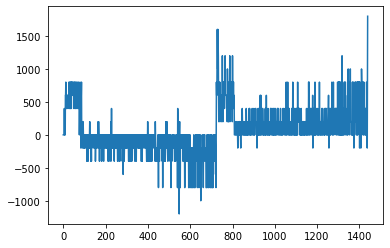

In [107]:
all_pats = patterns.sum(axis=1)
print(all_pats)
all_pats.plot()

## X paramiter for feeding Model

In [108]:
X = df.drop(['Sum'], axis=1)
X

,BuyQuoteVolume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,...,Change,Close,High,Low,Open,Trades,VolumeBTC,VolumeBUSD,rsi,rsisignal
0,12.17745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000119,16841.23,16842.68,16840.44,16841.25,1012.0,22.19256,3.737574e+05,0.000000,0.0
1,10.11766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000119,16780.84,16782.84,16780.13,16780.86,959.0,16.05611,2.694465e+05,0.000000,0.0
2,15.68889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000178,16842.60,16843.59,16840.26,16842.63,1397.0,31.72397,5.342920e+05,0.000000,0.0
3,11.53437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000178,16842.08,16842.97,16841.06,16842.11,647.0,17.23217,2.902238e+05,0.000000,0.0
4,6.94100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000178,16806.78,16808.76,16806.15,16806.81,800.0,12.86098,2.161559e+05,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,153.89067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.165625,16849.03,16849.04,16816.46,16821.17,5075.0,281.49546,4.737096e+06,49.608521,0.0
1436,386.32321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.224524,16886.84,16905.74,16846.50,16849.01,11123.0,721.90139,1.218545e+07,59.559254,0.0
1437,1026.64409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.629402,16941.00,16955.00,16735.00,16835.04,27033.0,2102.18665,3.535400e+07,-29.877019,-100.0
1438,6.70223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000059,16849.32,16851.63,16848.30,16849.31,898.0,15.59350,2.627447e+05,45.161426,0.0


## Y paramiter for feedind Model

In [109]:
y = df['Sum']
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
1435    200.0
1436    100.0
1437   -100.0
1438    500.0
1439    900.0
Name: Sum, Length: 1440, dtype: float64

## Model for AI Research

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier()
# model=RandomForestClassifier()
model

DecisionTreeClassifier()

## Fit X and y data to model

In [111]:
# model.fit(X, y)

## Calculating the Accuracy
### Normally I take very small data for that but in real application we have to take very big dataset

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.1)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)
print(len(predictions))
accuracy_score(y_test, predictions)

[   0.    0. -100.  300.    0. -400. -200.    0.  400.  100.  100. -100.
  200.  400.  400.    0.    0.    0. -100.    0.  300. -200.  200.    0.
  200.  400.  100.    0.    0.  100.    0. -100. -100. -100. -500.    0.
  300.    0. -400. -100.    0.    0.    0.  100. -100. -100.    0.    0.
    0.  200.    0.    0.  200. -100.  100.    0.    0.  100.    0.  200.
    0. -400.    0.  300.    0.  200. -100.  100.    0.  200.  100.  400.
  100. -200.  200.  200.    0.  200.    0. -200.  300.    0. -100.    0.
  100.    0.  200.  200.  300.    0.    0. -200.    0.  200.  400.    0.
  300. -100.  100.  300.  200.    0. -100.    0.    0.  100. -100. -100.
    0.    0.  200.    0.    0.  200.  100.  300. -100.    0. -100.    0.
 -100.    0.    0.  400.    0.    0. -200. -400.    0.  400. -100. -100.
  200.    0.  300.  500. -200.    0.    0. -200.    0.    0.  100.    0.]
144


0.9513888888888888

## Export Train model

In [ ]:
import joblib
model = model.fit(X_train, y_train)
joblib.dump(model, "btcbusd_trand_predictor.joblib")

## Directally Grab Fidable data from internet but it have to be superviged test data from database

## Make Prediction With Train Model

In [ ]:
from dataframe import GetDataframe
symbol = "BTCBUSD"

df = GetDataframe().get_minute_data(symbol, 1, 5)
df = df.iloc[:,0:10]
df.astype(float)
# df = df.drop(columns=['symbol','VolumeBUSD', 'CloseTime'])
# df = df.iloc[0]
# print(df)
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
# print(results)
# print(cols)

patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns["Sum"] = patterns.sum(axis=1)
patterns
df = df.add(patterns, fill_value=0)
df = df.drop(['CloseTime', 'Sum'], axis=1)
df = df.iloc[-2]
# print(df)
print(model.predict([df]))

In [ ]:
# print(df)

model = joblib.load("btcbusd_trand_predictor.joblib")
predictions = model.predict([df])
predictions

## All Coulms need for creat a Visual Representation

In [ ]:
feature_name = list(X.columns)

## Export model in dot visual language
class_names=sorted(y.unique()),

In [ ]:
from sklearn import tree
model = DecisionTreeClassifier()
model.fit(X, y)
tree.export_graphviz(model, out_file='btc_busd_visual.dot',
                    feature_names=feature_name,
                     label='all',
                     rounded=True,
                     filled=True
                    )

## Use Tensorflow

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Dense(256, input_shape=X_train.shape, activation='sigmoid'))
model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# model.fit(X_train, y_train, epochs=1000)